# Distribución del dataset

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

Text(0.5, 1.02, 'Distribución Multivariable del Dataset Iris')

<Figure size 1200x800 with 0 Axes>

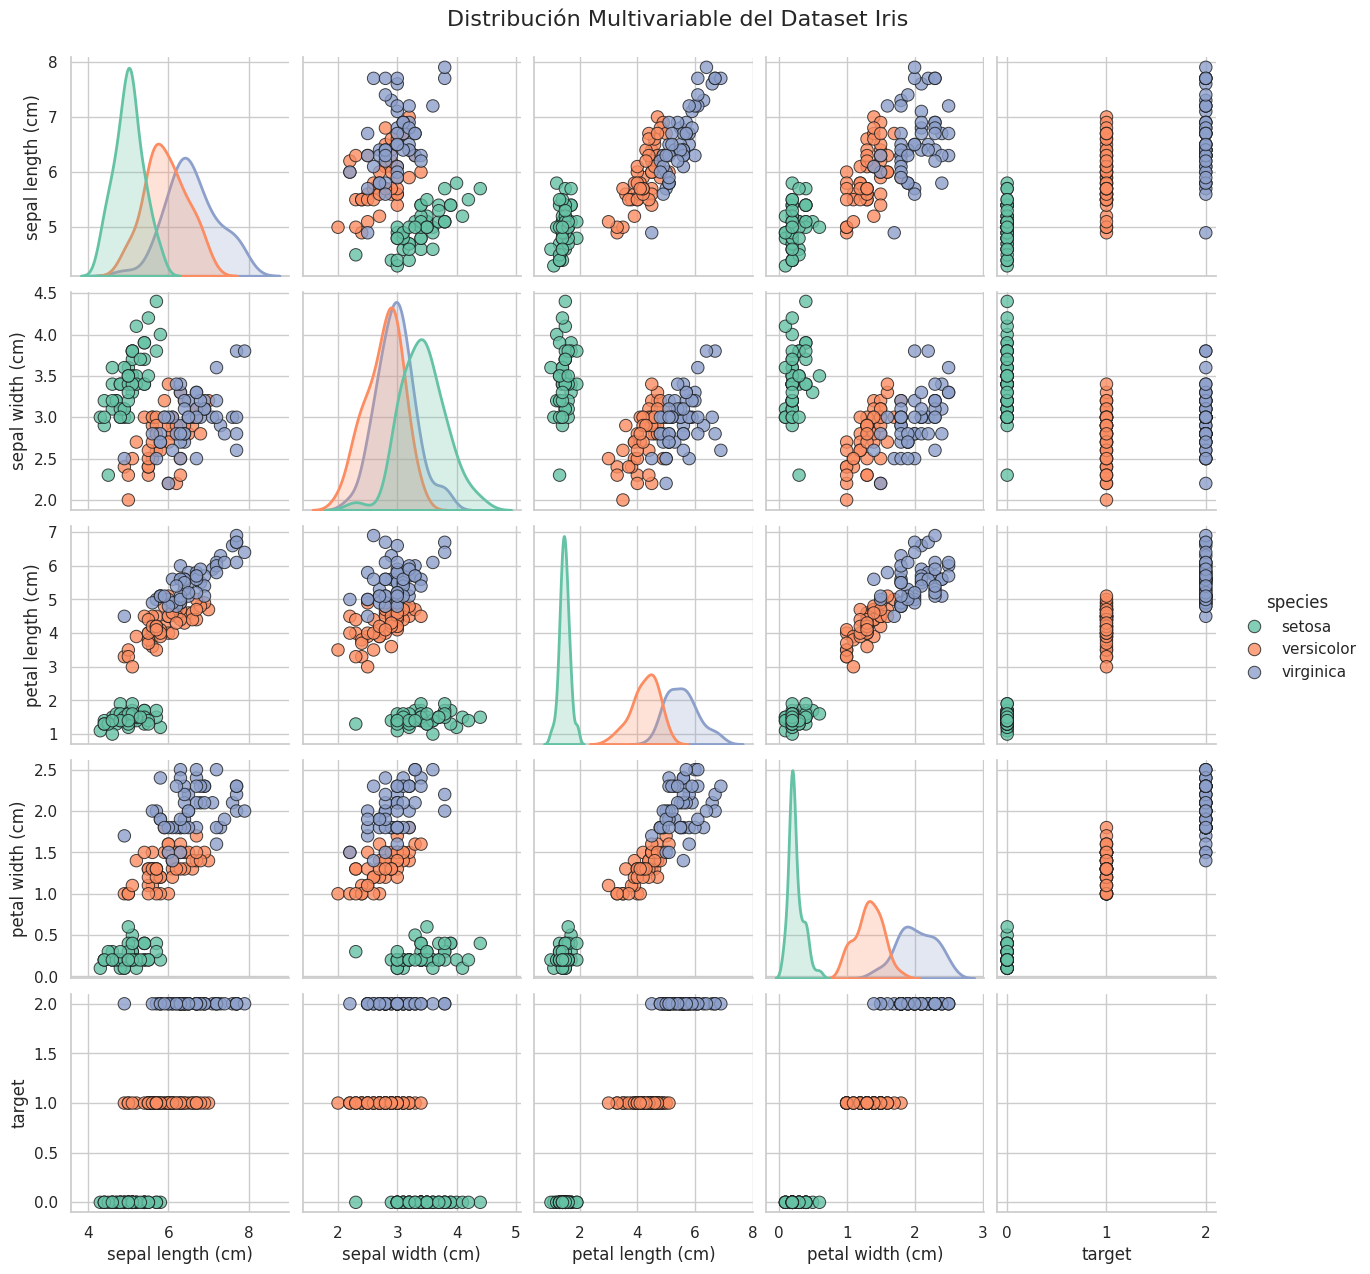

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar el dataset
iris = load_iris()

# Crear DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Configuración de estilo
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 8))

# 1. Pairplot mejorado
pair_plot = sns.pairplot(df,
                        hue='species',
                        palette='Set2',
                        height=2.5,
                        diag_kind='kde',
                        plot_kws={'alpha': 0.8, 's': 80, 'edgecolor': 'k'},
                        diag_kws={'linewidth': 2, 'shade': True})

pair_plot.fig.suptitle('Distribución Multivariable del Dataset Iris', y=1.02, fontsize=16)


Código para el método de clasificación de vecinos más cercanos

Accuracy: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



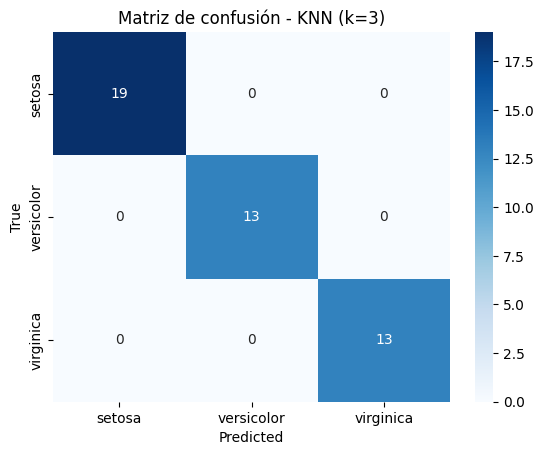

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Estandarizar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 4. Modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

# 5. Predicciones
y_pred = knn.predict(X_test_std)

# 6. Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=target_names))

# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusión - KNN (k=3)')
plt.show()

Estamos ocupando las 4 variables del Iris, lo cual da al modelo toda la. información original por lo que KNN puede clasificarlo con mucha exactitud. Por el otro lado, el report de clasificación real refleja el rendimiento real cuando usas todo el dataset.

# Frontera de decisión
Ayuda a ver cómo KNN divide el espacio entre clases. En este caso solo usamos dos variables, largo y ancho del sépalo, para simplidicar el espacio y así poder visualizar mejorel contenido.

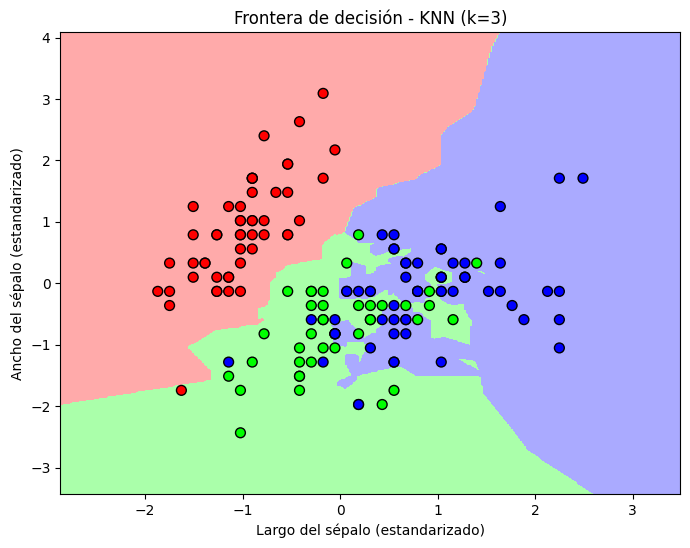

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Seleccionamos solo dos características (para graficar en 2D)
X_2d = iris.data[:, :2]  # Usamos largo y ancho del sépalo
y = iris.target

# Estandarizamos
X_2d_std = StandardScaler().fit_transform(X_2d)

# Entrenamos modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_2d_std, y)

# Creamos una malla de puntos para graficar
h = .02  # Resolución
x_min, x_max = X_2d_std[:, 0].min() - 1, X_2d_std[:, 0].max() + 1
y_min, y_max = X_2d_std[:, 1].min() - 1, X_2d_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Clasificamos todos los puntos de la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Graficamos la frontera y los puntos de datos
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_2d_std[:, 0], X_2d_std[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Largo del sépalo (estandarizado)')
plt.ylabel('Ancho del sépalo (estandarizado)')
plt.title("Frontera de decisión - KNN (k=3)")
plt.show()

Cada color de fondo representa la clase que KNN asignaría a esa zona del espacio.

Los puntos reales son las flores clasificadas (coloreadas segun su clase real).

Si hay puntos mal clasificados están en la "zona equivocada".

# Gráfica con frontera de decision con 4 variables y PCA
Reduce el dataset de 4 a 2 dimensiones y así graficamos, de manera comprimida toda la información.

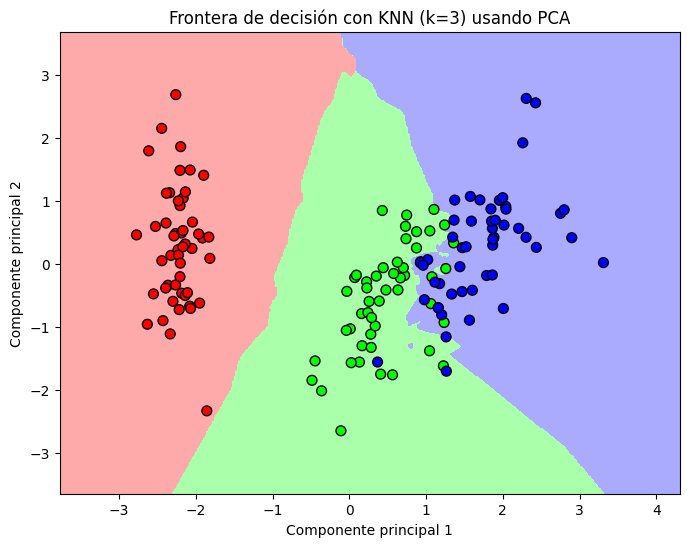

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Escalar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Aplicar PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Entrenar modelo KNN (usamos los datos reducidos)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y)

# Crear malla para graficar las fronteras
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Graficar
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Frontera de decisión con KNN (k=3) usando PCA')
plt.show()

k=1: Exactitud = 96.67%
k=2: Exactitud = 93.33%
k=3: Exactitud = 93.33%
k=4: Exactitud = 93.33%
k=5: Exactitud = 93.33%
k=6: Exactitud = 93.33%
k=7: Exactitud = 96.67%
k=8: Exactitud = 93.33%
k=9: Exactitud = 96.67%
k=10: Exactitud = 96.67%
k=11: Exactitud = 96.67%
k=12: Exactitud = 96.67%
k=13: Exactitud = 96.67%
k=14: Exactitud = 96.67%
k=15: Exactitud = 96.67%
k=16: Exactitud = 96.67%
k=17: Exactitud = 96.67%
k=18: Exactitud = 96.67%
k=19: Exactitud = 96.67%
k=20: Exactitud = 96.67%


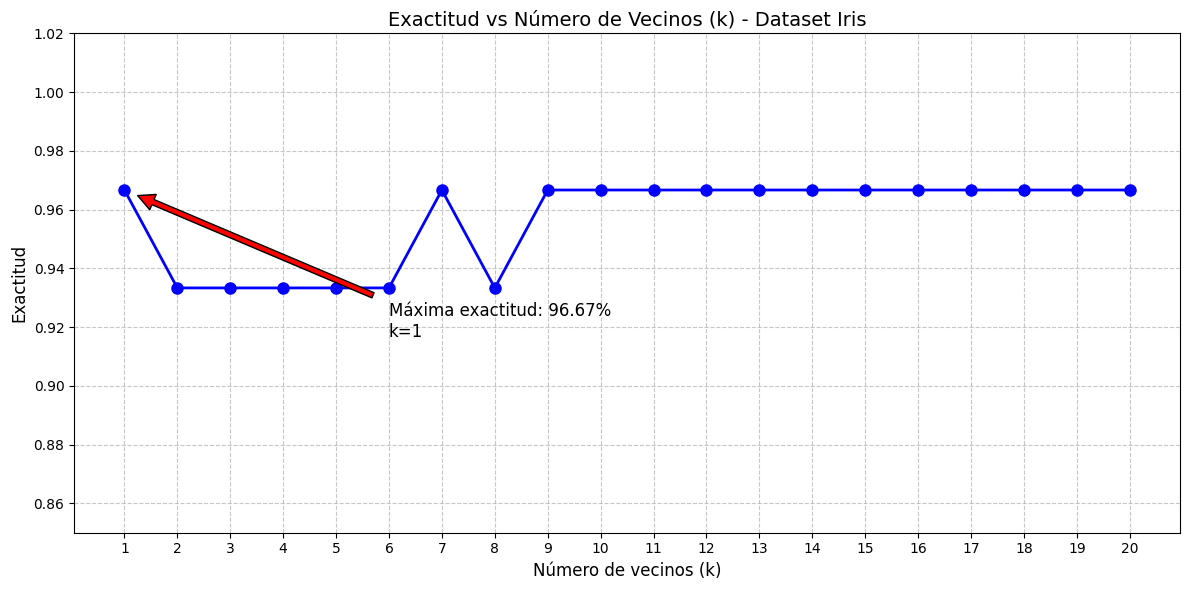


Resumen de resultados:
Mejor k: 1
Máxima exactitud: 96.67%
Exactitudes por k:
k=1 : 96.67%
k=2 : 93.33%
k=3 : 93.33%
k=4 : 93.33%
k=5 : 93.33%
k=6 : 93.33%
k=7 : 96.67%
k=8 : 93.33%
k=9 : 96.67%
k=10: 96.67%
k=11: 96.67%
k=12: 96.67%
k=13: 96.67%
k=14: 96.67%
k=15: 96.67%
k=16: 96.67%
k=17: 96.67%
k=18: 96.67%
k=19: 96.67%
k=20: 96.67%


In [ ]:
# Importaciones necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Características (4 dimensiones)
y = iris.target  # Etiquetas (3 clases)

# 2. Dividir los datos en entrenamiento (80%) y prueba (20%)
# Fijamos random_state para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantiene proporción de clases
)

# 3. Normalización de datos (crítico para KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajuste y transformación a train
X_test = scaler.transform(X_test)  # Solo transformación a test (sin ajuste)

# 4. Evaluar diferentes valores de k
k_values = range(1, 21)  # Probamos k de 1 a 20
accuracies = []

for k in k_values:
    # Crear y entrenar modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predecir y calcular exactitud CORRECTAMENTE
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}: Exactitud = {accuracy:.2%}")

# 5. Visualización profesional
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.title('Exactitud vs Número de Vecinos (k) - Dataset Iris', fontsize=14)
plt.xlabel('Número de vecinos (k)', fontsize=12)
plt.ylabel('Exactitud', fontsize=12)
plt.xticks(k_values)
plt.ylim(0.85, 1.02)  # Límites fijos para mejor visualización
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Destacar el punto óptimo
max_acc = max(accuracies)
optimal_k = k_values[accuracies.index(max_acc)]
plt.annotate(f'Máxima exactitud: {max_acc:.2%}\nk={optimal_k}',
             xy=(optimal_k, max_acc),
             xytext=(optimal_k+5, max_acc-0.05),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12)

plt.show()

# 6. Resultados numéricos
print("\nResumen de resultados:")
print(f"Mejor k: {optimal_k}")
print(f"Máxima exactitud: {max_acc:.2%}")
print(f"Exactitudes por k:")
for k, acc in zip(k_values, accuracies):
    print(f"k={k:<2}: {acc:.2%}")